# Fitting a Model to Experimental Data

The following cell provides an interactive tool for 'tuning' the model to fit the experimental data. Work with the sliders to find good choices for each of the parameters. 

## Step Test Data

**Starting with a system at steady state**, record the response of T1 to a step input of 50% power with P1 = 200.

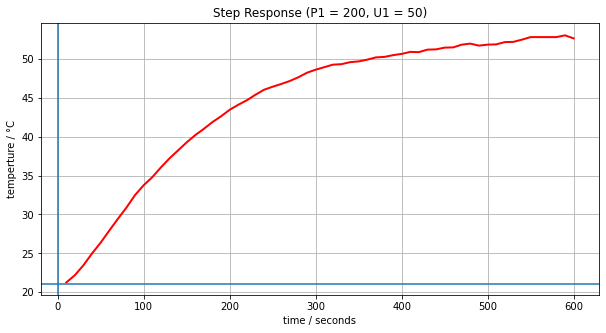

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_file = "data/Model_Data.csv"
data = pd.read_csv("https://jckantor.github.io/cbe30338-2021/" + data_file).set_index("Time")[1:]
t = data.index
T1 = data['T1'].values

# known parameters
T_amb = 21             # deg C
alpha = 0.00016        # watts / (units P1 * percent U1)
P1 = 200               # P1 units
U1 = 50                # steady state value of u1 (percent)

# visualization
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax = [ax]
ax[0].plot(t, T1, 'r', lw=2)
ax[0].axhline(T_amb)
ax[0].axvline(0)
ax[0].set_xlabel("time / seconds")
ax[0].set_ylabel("temperture / °C")
ax[0].set_title(f"Step Response (P1 = {P1}, U1 = {U1})")
ax[0].grid(True)

## Model

$$\begin{align}
C_p\frac{dT_1'}{dt} & = - U_aT_1' + \alpha P_1u_1
\end{align}$$

### First Order Linear Differential Equations

A standard form for a single differential equation is

$$\begin{align}
\frac{dx}{dt} & = ax + bu
\end{align}$$

One last manipulation will bring this model into a commonly used standard form

$$\begin{align}
\frac{dT_1'}{dt} & = \underbrace{- \frac{U_a}{C_p}}_a T_1' + \underbrace{\frac{\alpha P_1}{C_p}}_b u_1
\end{align}$$


where $a$ and $b$ are model constants, $x$ is the dependent variable, and $u$ is an exogeneous input.  

#### Steady State Response

For a constant value $\bar{u}$, the steady state response $\bar{x}$ is given by solution to the equation

$$\begin{align}
0 & = a\bar{x} + b\bar{u}
\end{align}$$

which is

$$\begin{align}
\bar{x} & = -\frac{b}{a} \bar{u}
\end{align}$$

#### Transient Response

The transient response is given by

$$\begin{align}
x(t) & = \bar{x} + \left[x(t_0) - \bar{x}\right] e^{a(t-t_0)}
\end{align}$$

which is an exact, analytical solution.

#### Apply to Model Equation

We now apply this textbook solution to the model equation. Comparing equations, we make the following identifications

$$\begin{align}
T_1' \sim x \\
-\frac{U_a}{C_p} \sim a \\
\frac{\alpha P_1}{C_p} \sim b \\
u_1 \sim u
\end{align}$$

Substituting these terms into the standard solution we confirm the steady-state solution found above, and provides a solution for the transient response of the deviation variables.

$$\begin{align}
\bar{x} = -\frac{b}{a}\bar{u} \qquad & \Rightarrow \qquad \bar{T}_{1}' = \frac{\alpha P_1}{U_a}\bar{u}_{1} \\
x(t) = \bar{x} + \left[x(t_0) - \bar{x}\right] e^{a(t-t_0)} \qquad & \Rightarrow \qquad
T_1'(t) = \frac{\alpha P_1}{U_a}\bar{u}_{1} + \left[T_1'(t_0) - \frac{\alpha P_1}{U_a}\bar{u}_{1}\right]e^{-\frac{U_a}{C_p}(t-t_0)}
\end{align}$$

## Plot a fit

Let's try a guess fit.

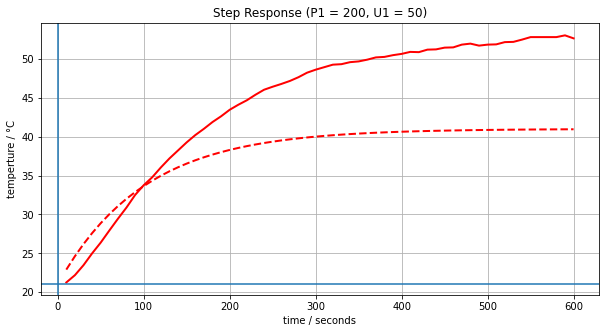

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_file = "data/Model_Data.csv"
data = pd.read_csv("https://jckantor.github.io/cbe30338-2021/" + data_file).set_index("Time")[1:]
t = data.index
T1 = data['T1'].values

# known parameters
T_amb = 21             # deg C
alpha = 0.00016        # watts / (units P1 * percent U1)
P1 = 200               # P1 units
U1 = 50                # steady state value of u1 (percent)

# model p
Ua = 0.08              # watts/deg C
Cp = 8                 # joules/deg C

# model
T1_dev_initial = 0
T1_dev_ss = alpha*P1*U1/Ua
T1_dev = T1_dev_ss + (T1_dev_initial - T1_dev_ss)*np.exp(-Ua*t/Cp)
T1_model = T1_dev + T_amb

# visualization
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax = [ax]
ax[0].plot(t, T1, 'r', lw=2)
ax[0].plot(t, T1_model, 'r--', lw=2)
ax[0].axhline(T_amb)
ax[0].axvline(0)
ax[0].set_xlabel("time / seconds")
ax[0].set_ylabel("temperture / °C")
ax[0].set_title(f"Step Response (P1 = {P1}, U1 = {U1})")
ax[0].grid(True)

## Improving the fit

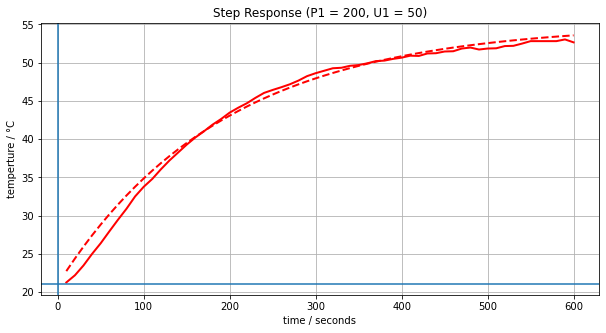

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_file = "data/Model_Data.csv"
data = pd.read_csv("https://jckantor.github.io/cbe30338-2021/" + data_file).set_index("Time")[1:]
t = data.index
T1 = data['T1'].values

# known parameters
T_amb = 21             # deg C
alpha = 0.00016        # watts / (units P1 * percent U1)
P1 = 200               # P1 units
U1 = 50                # steady state value of u1 (percent)

# model p
Ua = 0.047              # watts/deg C
Cp = 9                # joules/deg C

# model
T1_dev_initial = 0
T1_dev_ss = alpha*P1*U1/Ua
T1_dev = T1_dev_ss + (T1_dev_initial - T1_dev_ss)*np.exp(-Ua*t/Cp)
T1_model = T1_dev + T_amb

# visualization
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax = [ax]
ax[0].plot(t, T1, 'r', lw=2)
ax[0].plot(t, T1_model, 'r--', lw=2)
ax[0].axhline(T_amb)
ax[0].axvline(0)
ax[0].set_xlabel("time / seconds")
ax[0].set_ylabel("temperture / °C")
ax[0].set_title(f"Step Response (P1 = {P1}, U1 = {U1})")
ax[0].grid(True)

## Measuring the Fit

* Sum of Squares

$$SOS = \sum_n (T^{model}_1(t_k) - T^{expt}_1(t_i))^2$$

* Sum of Absolute Values

$$SAE = \sum_n |T^{model}_1(t_k) - T^{expt}_1(t_i)|$$

434.7646349068996

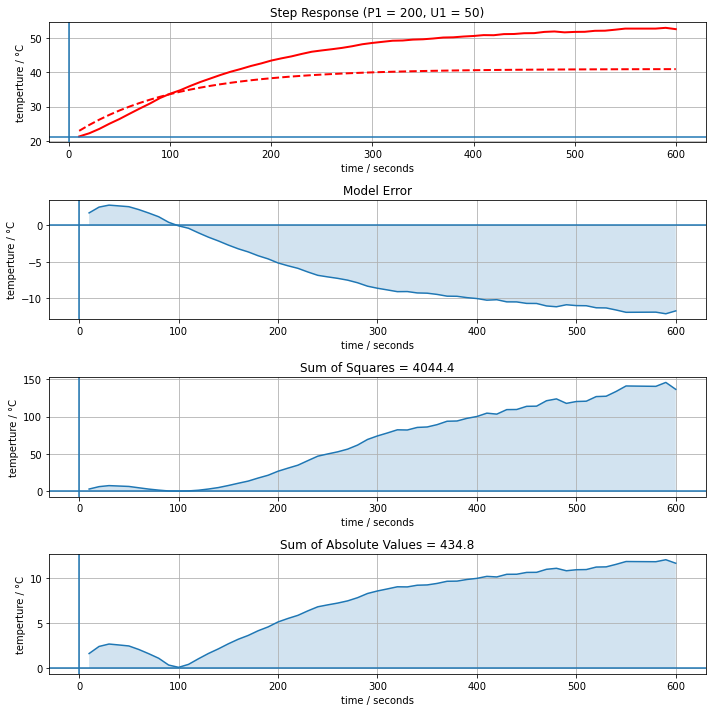

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_file = "data/Model_Data.csv"
data = pd.read_csv("https://jckantor.github.io/cbe30338-2021/" + data_file).set_index("Time")[1:]
t = data.index
T1 = data['T1'].values

# known parameters
T_amb = 21             # deg C
alpha = 0.00016        # watts / (units P1 * percent U1)
P1 = 200               # P1 units
U1 = 50                # steady state value of u1 (percent)

# model p
Ua = 0.08              # watts/deg C
Cp = 8                 # joules/deg C

def compare(p, plot=False):
    
    Ua, Cp = p

    # model
    T1_dev_initial = 0
    T1_dev_ss = alpha*P1*U1/Ua
    T1_dev = T1_dev_ss + (T1_dev_initial - T1_dev_ss)*np.exp(-Ua*t/Cp)
    T1_model = T1_dev + T_amb

    # model mismatch
    sse = sum((T1_model - T1)**2)
    sae = sum(np.abs(T1_model - T1))

    # visualization
    if plot:
        fig, ax = plt.subplots(4, 1, figsize=(10,10))
        ax[0].plot(t, T1, 'r', lw=2)
        ax[0].plot(t, T1_model, 'r--', lw=2)
        ax[0].axhline(T_amb)
        ax[0].axvline(0)
        ax[0].set_xlabel("time / seconds")
        ax[0].set_ylabel("temperture / °C")
        ax[0].set_title(f"Step Response (P1 = {P1}, U1 = {U1})")
        ax[0].grid(True)

        ax[1].plot(t, T1_model - T1)
        ax[1].axhline(0)
        ax[1].axvline(0)
        ax[1].fill_between(t, T1_model - T1, alpha=0.2)
        ax[1].set_title(f'Model Error')
        ax[1].set_xlabel("time / seconds")
        ax[1].set_ylabel("temperture / °C")
        ax[1].grid(True)

        ax[2].plot(t, (T1_model - T1)**2)
        ax[2].axhline(0)
        ax[2].axvline(0)
        ax[2].fill_between(t, (T1_model - T1)**2, alpha=0.2)
        ax[2].set_title(f'Sum of Squares = {sse:0.1f}')
        ax[2].set_xlabel("time / seconds")
        ax[2].set_ylabel("temperture / °C")
        ax[2].grid(True)

        ax[3].plot(t, np.abs(T1_model - T1))
        ax[3].axhline(0)
        ax[3].axvline(0)
        ax[3].fill_between(t, np.abs(T1_model - T1), alpha=0.2)
        ax[3].set_title(f'Sum of Absolute Values = {sae:0.1f}')
        ax[3].set_xlabel("time / seconds")
        ax[3].set_ylabel("temperture / °C")
        ax[3].grid(True)

        plt.tight_layout()

    return sae
    
compare([Ua, Cp], plot=True)

## An Aside: "The Impact of the Highly Improbable"

### Gaussian (or Normal) Distribution

![](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png)

### Heavy Tail Distributions

![](http://www.bitsofscience.org/wordpress-3.0.1/wordpress/wp-content/uploads//extreme-weather-gaussian.jpg)

![](https://i.stack.imgur.com/OZctU.png)

### Conclusion: Rare events may not be so rare. Avoid overfitting extreme values!

## Finding a best fit

Optimization terminated successfully.
         Current function value: 37.283064
         Iterations: 48
         Function evaluations: 94


37.28306442164941

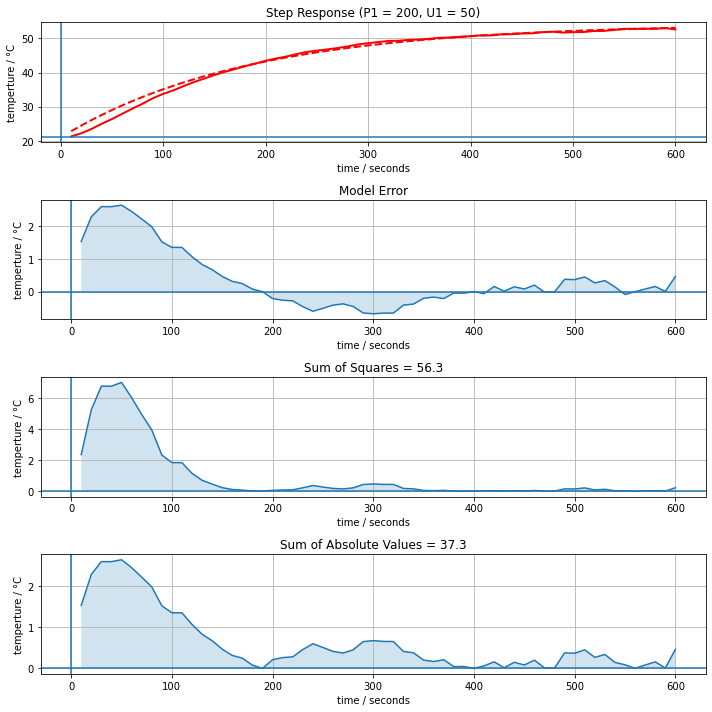

In [16]:
from scipy.optimize import fmin

p = fmin(compare, [Ua, Cp])
compare(p, plot=True)

Let's fit a model to the data.

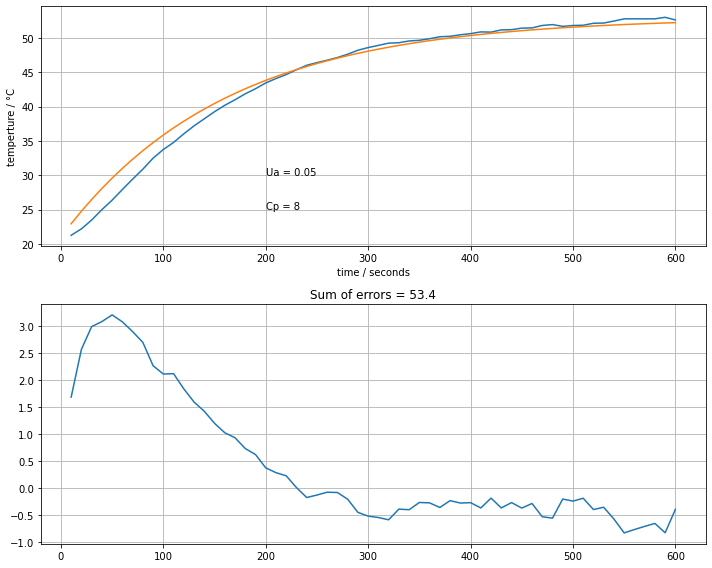

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_file = "data/Model_Data.csv"
data = pd.read_csv("https://jckantor.github.io/cbe30338-2021/" + data_file).set_index("Time")[1:]
t = data.index
T1 = data['T1'].values

# parameter values and units
alpha = 0.00016        # watts / (units P1 * percent U1)
P1 = 200               # P1 units
Ua = 0.05              # watts/deg C
Cp = 6                 # joules/deg C
U1 = 50                # steady state value of u1 (percent)
T_amb = 21             # deg C

def compare(Ua, Cp):
    T1_dev_initial = 0
    T1_dev_ss = alpha*P1*U1/Ua
    T1_dev = T1_dev_ss + (T1_dev_initial - T1_dev_ss)*np.exp(-Ua*t/Cp)
    T1_model = T1_dev + T_amb
    
    fig, ax = plt.subplots(2, 1, figsize=(10,8))
    
    ax[0].plot(t, T1, t, T1_model)
    ax[0].set_xlabel('time / seconds')
    ax[0].set_ylabel('temperture / °C')
    ax[0].grid(True)

    ax[0].text(200, 30, f'Ua = {Ua}')
    ax[0].text(200, 25, f'Cp = {Cp}')
    
    ax[1].plot(t, T1_model - T1)
    ax[1].set_title(f'Sum of errors = {sum(abs(T1_model-T1)):0.1f}')
    ax[1].grid(True)
    
    plt.tight_layout()

compare(0.05, 8)

:::{admonition} Study Question

1. By trial and error using the `compare()` function defined above, tetermine values for $U_a$ and $C_p$ that yield a good fit of the model to the data. 

1. Are you able to remove all systematic error? If not, why not?

1. The sum of absolute errors is shown on the chart. Try to find values of $U_a$ and $C_p$ that minimize this error criterion. In your opinion, is that the best choice of model parameters? Why or why not?

1. Does this solution make sense? The [specific heat capacity for solids](https://en.wikipedia.org/wiki/Heat_capacity) is typically has values in the range of 0.2 to 0.9 watts/degC/gram. Using a value of 0.9 that is typical of aluminum and plastics used for electronic products, what would be the estimated mass of the heater/sensor combination?

1. Suppose we want to improve the model. Where should we go from here?  

:::

## Exercises

1. This notebook attempted to fit a first-order model of a heater/sensor assembly to experimental data. In the course of the fit, estimates were derived for parameters $\alpha$, P1, $U_a$, and $C_p$. From these parameter values, estimate a time constant. 

2. Apply the techniques outlined in Section 2.2 for the estimation of time constants from experimental data. How does that value compare to the calculation in the first question?

3. It's not always possible to wait for a system to reach steady state. Create a new function, `compare3`, that introduces a third unknown parameter representing an initial condition different for $T'_1(0)$ that is different from zero.